### Loading Brian's Macy's SEO Data

In [163]:
import pandas as pd

In [293]:
wedding_df = pd.read_csv("Wedding Keyword Scrape.csv")
wedding_df.head()

,Keyword,Rank,Title,Link,Description
0,wedding gifts,1,"Unique Wedding Gifts, Cool Gift Ideas | Uncomm...",www.uncommongoods.com/occasions/wedding-gifts,Discover unique wedding gifts at UncommonGoods...
1,wedding gifts,2,Wedding Gifts: Unique Bride &amp; Groom Gifts ...,www.personalizationmall.com/Personalized-Weddi...,Find the best collection of personalized weddi...
2,wedding gifts,3,Personalized Wedding Gifts at Things Remembered,www.thingsremembered.com/section/Wedding/2114.uts,Personalized wedding gifts that will make this...
3,wedding gifts,4,Popular items for wedding gift on Etsy,https://www.etsy.com/market/wedding_gift,"Shop outside the big box, with unique items fo..."
4,wedding gifts,5,ENGAGEMENT &amp; WEDDING GIFTS - Gifts.com,https://www.gifts.com/ideas/wedding,"When you think about it, buying a wedding gift..."


### Number of Records

In [41]:
len(wedding_df)

1411

### Number of Strange Link Names

In [75]:
def is_strange(link) : return "." not in link

print sum(wedding_df.Link.apply(is_strange))

52


In [76]:
print wedding_df.Link[wedding_df.Link.apply(is_strange)].unique()

['No link found' 'Cambio' 'E! Online']


* Link = No link found -> Images of X
* Link = E! Online -> News for X
* Cambio?

### Top-level Domains

In [83]:
pd.DataFrame({'top_level_domain': ['.com', '.org', '.edu', '.co', '.ca', '.st', '205.153.117.210'],
              'count': [1320, 12, 2, 22, 1, 1, 1]},
            columns = ['top_level_domain', 'count'])

,top_level_domain,count
0,.com,1320
1,.org,12
2,.edu,2
3,.co,22
4,.ca,1
5,.st,1
6,205.153.117.210,1


### Rank Proportions

In [509]:
wedding_df.Rank.value_counts()

7     142
6     142
5     142
4     142
3     142
2     142
1     142
10    139
9     139
8     139
dtype: int64

* Close to being uniformly distributed
* Rank 8-10 appear less in the data

### Domains

In [316]:
from tld import get_tld

def parse_topleveldomain(link):
    if (not link.startswith("http") ) and ( not is_strange(link) ):
        link = "http://" + link
        
    try:
        return get_tld(link)
    except:
        return link

wedding_df['Domain'] = wedding_df.Link.apply(parse_topleveldomain)

### Total Number of Sites

In [317]:
len(wedding_df.Domain.unique())

246

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.mpl_style = 'default'
sns.set_palette("deep", desat=.6)

MAX_NUM_CATEGORIES_TO_USE_BAR = 50

### Most Frequently Appearing Domains

In [211]:
vc = wedding_df['Domain'].value_counts()
ordered_index = vc.index
ordered_index = ordered_index[:MAX_NUM_CATEGORIES_TO_USE_BAR]

ax = vc[reversed(ordered_index)].plot(kind='barh',
                                      figsize=(8, min(max(4, np.ceil(len(vc.values)/4.0)), 24)),
                                      title="Most Frequently Appeared Domains (first {0})\n\n".format(MAX_NUM_CATEGORIES_TO_USE_BAR),
                                      width=1.0)
ax.tick_params(labeltop=True)
ax.set_xlabel("Frequency")
ax.xaxis.set_label_position('top') 
 
# annotate bar counts
for x,y in zip(range(len(vc)), vc[reversed(ordered_index)].values):
    (xlim_min, xlim_max) = ax.get_xlim()
    
    if y > xlim_max*0.9:
        ax.annotate(str(y),xy=(y*.95,x), color="white")
    else:
        ax.annotate(str(y),xy=(y*1.1,x), color="black")
    
    # %%show a scale of percentage proportions on right y-axis
    total_count = sum(vc[reversed(ordered_index)].values)
    percentage_proportions = (100.0*vc[reversed(ordered_index)].values) / total_count
    percentage_proportions = map(lambda p : "%.2f%%" % p, percentage_proportions)
    for_right_yaxis = ax.twinx()
    for_right_yaxis.set_yticks(ax.get_yticks())
    for_right_yaxis.set_yticklabels(percentage_proportions)
    for_right_yaxis.set_ylim(ax.get_ylim())
    for_right_yaxis.grid(False)
    
xmacys = vc.index.tolist().index('macys.com')
    
plt.savefig("most_frequently_appeared_domains.png", format="png")
plt.close()

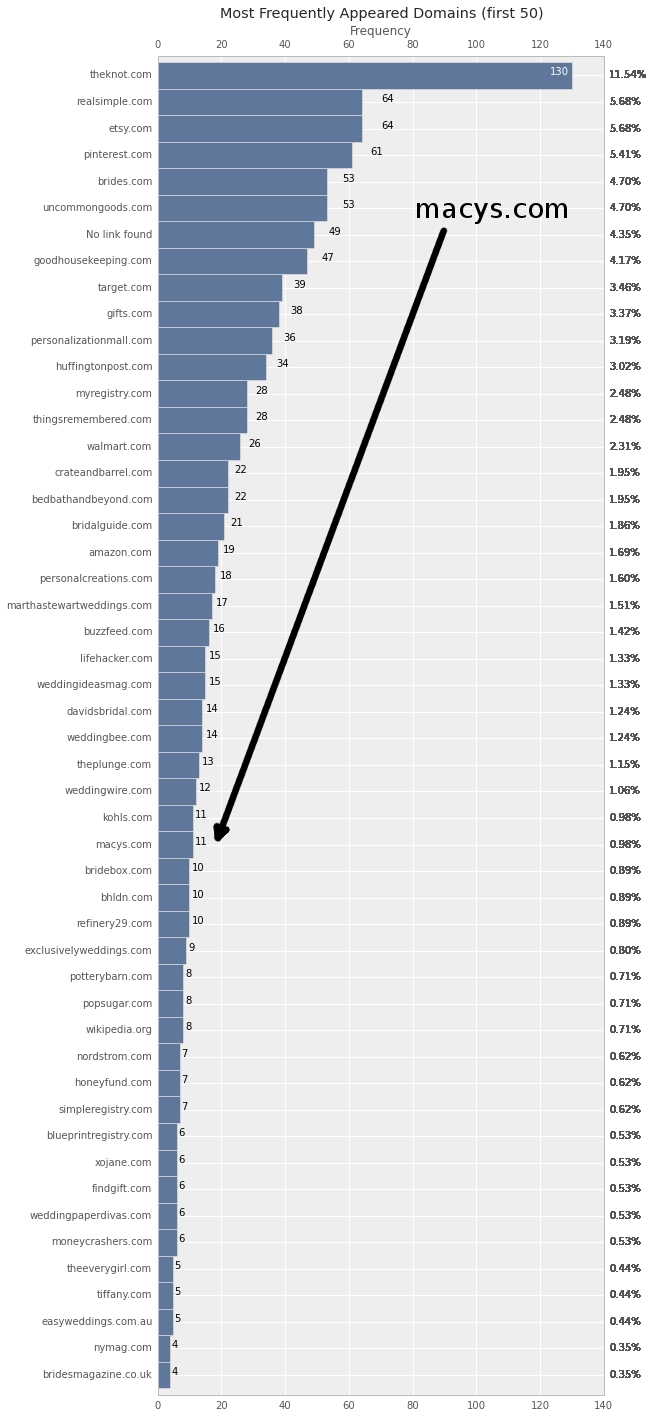

In [210]:
Image("./wedding_bar.png")

### Macy's Rankings

* only 11 out of the 1411 records
* "wedding registry" brings up the best rank for https://www.macys.com/wedding-registry
* plural "gifts" is bad
* singular "gift" is better than registry
* but place "wedding" before "gift"

In [261]:
macys_df = wedding_df[wedding_df.Domain=='macys.com']
macys_df.sort('Rank')

,Keyword,Rank,Title,Link,Description,Domain
1054,wedding registry gift,4,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
1094,wedding and gift registry,4,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
1175,gift registry search,5,Registry Search - Macy's,www.macys.com/registry/wedding/registrysearch,back to macys.com; help; rewards program · reg...,macys.com
35,wedding gift registry,6,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
45,wedding registry finder,6,Registry Search - Macy's,www.macys.com/registry/wedding/registrysearch,back to macys.com; help; rewards program · reg...,macys.com
1087,gift registry wedding,7,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
1107,at home gift registry,7,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
28,wedding registry,9,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"Extra 15 percent off, Extra 10 percent off ele...",macys.com
938,wedding gift registries,9,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
975,wedding gifts registry,9,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com


In [250]:
n_ratings = len(wedding_df.Rank.unique())

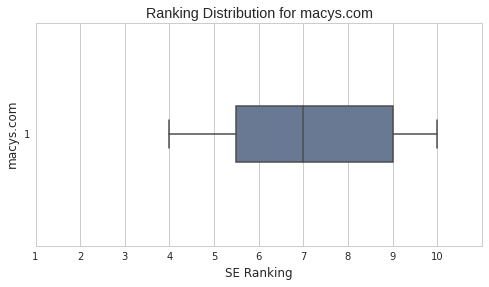

In [260]:
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(macys_df.Rank.values, vert=False, widths=0.25)
ax.set_xlim((1, n_ratings+1))
ax.set_xticks(range(1, n_ratings+1));
ax.set_title("Ranking Distribution for macys.com")
ax.set_ylabel("macys.com")
ax.set_xlabel("SE Ranking")

In [780]:
rank_df = wedding_df[['Domain', 'Rank']].groupby('Domain').agg(['mean', 'count'])
rank_df

Rank      
                                  mean count
Domain                                      
500px.com                     5.000000     1
Cambio                       10.000000     1
E! Online                     6.500000     2
No link found                 4.571429    49
about.com                     9.000000     1
afloral.com                   7.333333     3
airnewzealand.co.nz          10.000000     1
alannahrose.com.au           10.000000     1
alaskabride.com               7.000000     1
allwomenstalk.com             6.000000     1
amazingregistry.com           6.500000     2
amazon.co.uk                  6.000000     1
amazon.com                    6.105263    19
angieslist.com               10.000000     1
anthropologie.com             6.000000     1
apartmenttherapy.com          4.000000     1
apple.com                     4.000000     1
apracticalwedding.com         8.500000     2
archiesonline.com             3.500000     2
babble.com                    3.000000     1
babiesrus.com                 3.000000     2
babyli.st                     6.000000     1
bankrate.com                  6.000000     1
beau-coup.com                 9.000000     2
bedbathandbeyond.com          5.636364    22
bestbride101.com              9.000000     1
bestbuy.com                   7.250000     4
bhg.com                       9.333333     3
bhldn.com                     4.500000    10
bloomingdales.com             8.000000     2
...                                ...   ...
tyingtheknot.co.nz            5.000000     1
ucsf.edu                      2.000000     1
umich.edu                     4.000000     1
uncommon-courtesy.com         2.000000     1
uncommongoods.com             4.113208    53
venuelust.com                 7.000000     1
vertex42.com                  6.000000     1
vistaprint.com                5.000000     2
walmart.com                   6.153846    26
wanderable.com               10.000000     1
weddingbee.com                7.285714    14
weddingbycolor.com            3.500000     2
weddingdressonline.com        1.000000     1
weddinggiftsdirect.com.au     7.000000     2
weddingguide.com.au           2.000000     1
weddingideasmag.com           5.400000    15
weddingpaperdivas.com         4.000000     6
weddingpresentsdirect.co.uk   4.000000     1
weddingregistry.co.nz         3.000000     1
weddingwire.com               7.416667    12
wikihow.com                   8.000000     1
wikipedia.org                 4.750000     8
wilton.com                    8.000000     1
womangettingmarried.com       9.000000     1
wordpress.com                 9.000000     2
xojane.com                    7.666667     6
yahoo.com                     6.500000     4
youtube.com                   8.000000     1
zankyou.com                   4.333333     3
zazzle.com                    9.000000     1

[246 rows x 2 columns]

### Descriptions vs Rankings

In [486]:
import nltk
import string
import re
from collections import Counter

def remove_numbers(s):
    return ''.join([i for i in s if not i.isdigit()])

def remove_punctuation(s):
    exclude = set(string.punctuation)
    s = ''.join(ch for ch in s if ch not in exclude)
    return s

def lowercase_remove_punctuation(s):
    try:
        #s = s.decode("utf8")
        s = s.decode('ascii', 'ignore')
    except:
        s = str(s)
        
    s = s.lower()
    s = s.strip()
    s = s.rstrip()
    s = s.lstrip()
    s = s.replace('\n', '')
    return remove_punctuation(s)

def lowercase_remove_punctuation_and_tokenize(s):
    token_list = nltk.word_tokenize(remove_numbers(lowercase_remove_punctuation(s)))
    return token_list

def lowercase_and_make_description_wordlist_for_rank_class(sub_dataframe):
    s = map(lowercase_remove_punctuation_and_tokenize, sub_dataframe.Description)
    description_wordlist = reduce(lambda description_wordlist, desc_wl : description_wordlist + Counter(desc_wl), s, Counter())
    return description_wordlist.most_common(len(description_wordlist))

In [519]:
rank_vs_description_wordlist = wedding_df[['Description', 'Rank']].groupby('Rank').apply(lowercase_and_make_description_wordlist_for_rank_class)
rank_vs_description_wordlist

Rank
1       [(wedding, 148), (the, 125), (gift, 109), (and...
2       [(wedding, 146), (the, 125), (and, 109), (a, 8...
3       [(wedding, 161), (the, 100), (gift, 99), (a, 9...
4       [(wedding, 157), (the, 133), (and, 106), (regi...
5       [(wedding, 176), (the, 136), (for, 107), (and,...
6       [(wedding, 165), (and, 114), (the, 112), (for,...
7       [(wedding, 187), (the, 121), (and, 113), (a, 1...
8       [(wedding, 165), (the, 110), (and, 102), (a, 9...
9       [(wedding, 170), (the, 124), (a, 111), (and, 1...
10      [(wedding, 145), (the, 141), (and, 109), (a, 9...
dtype: object

In [490]:
map(lambda wl : len(wl), rank_vs_description_wordlist)

[520, 686, 668, 696, 748, 776, 738, 762, 809, 799]

* Higher Ranked sites typically have smaller description vocabulary

In [732]:
def preprocess_and_concatenate_descriptions(subdataframe):
    s = map(lambda s : remove_numbers(lowercase_remove_punctuation(s)), subdataframe.Description)
    s = reduce(lambda all_description, description : all_description + ' ' + description, s, '')
    return s

s = wedding_df[['Description', 'Rank']].groupby('Rank').apply(preprocess_and_concatenate_descriptions)

In [733]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()
td_matrix = countvec.fit_transform(s.values)

In [734]:
td_df = pd.DataFrame(td_matrix.toarray().T, columns=range(1, 11), index=countvec.get_feature_names())

In [741]:
topn = 10
topn_words_for_all_ranks_combined = reduce(lambda s, wclist : s | set(map(lambda wc : wc[0], wclist[:topn])), rank_vs_description_wordlist, set())

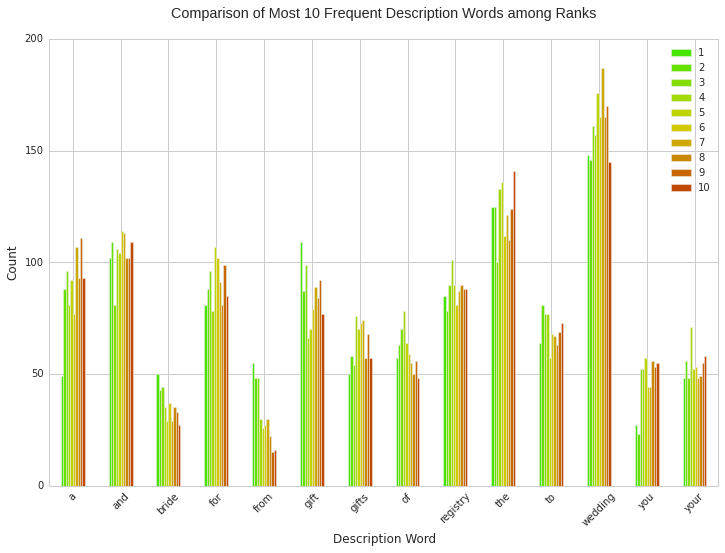

In [742]:
my_colors = ['#45E500', '#65E100', '#84DD00', '#A2D900', '#BED500', '#D2CA00', '#CEA800', '#CA8700', '#C66700', '#C24900', '#BF2C00']
ax = td_df.ix[sorted(topn_words_for_all_ranks_combined)].plot(kind='bar', figsize=(12, 8), color=my_colors)
ax.set_ylabel("Count")
ax.set_xlabel("Description Word")
plt.xticks(rotation=45);
plt.title("Comparison of Most {0} Frequent Description Words among Ranks\n".format(topn))
plt.savefig('comparison_frequent_words.png', type='png')

### Title vs Rankings

In [743]:
def lowercase_and_make_title_wordlist_for_rank_class(sub_dataframe):
    s = map(lowercase_remove_punctuation_and_tokenize, sub_dataframe.Title)
    description_wordlist = reduce(lambda description_wordlist, desc_wl : description_wordlist + Counter(desc_wl), s, Counter())
    return description_wordlist.most_common(len(description_wordlist))

rank_vs_title_wordlist = wedding_df[['Title', 'Rank']].groupby('Rank').apply(lowercase_and_make_title_wordlist_for_rank_class)
rank_vs_title_wordlist

Rank
1       [(wedding, 86), (gift, 78), (for, 64), (regist...
2       [(wedding, 100), (the, 61), (gift, 60), (regis...
3       [(wedding, 95), (gift, 60), (registry, 58), (f...
4       [(wedding, 112), (registry, 63), (gift, 53), (...
5       [(wedding, 115), (registry, 61), (gift, 56), (...
6       [(wedding, 114), (registry, 64), (gift, 46), (...
7       [(wedding, 118), (registry, 64), (gift, 53), (...
8       [(wedding, 126), (gifts, 60), (registry, 53), ...
9       [(wedding, 123), (gift, 60), (registry, 54), (...
10      [(wedding, 120), (registry, 55), (gifts, 46), ...
dtype: object

In [744]:
def preprocess_and_concatenate_titles(subdataframe):
    s = map(lambda s : remove_numbers(lowercase_remove_punctuation(s)), subdataframe.Title)
    s = reduce(lambda all_description, description : all_description + ' ' + description, s, '')
    return s

s = wedding_df[['Title', 'Rank']].groupby('Rank').apply(preprocess_and_concatenate_titles)

In [745]:
countvec = CountVectorizer()
td_matrix = countvec.fit_transform(s.values)
td_df = pd.DataFrame(td_matrix.toarray().T, columns=range(1, 11), index=countvec.get_feature_names())

In [746]:
topn = 10
topn_words_for_all_ranks_combined = reduce(lambda s, wclist : s | set(map(lambda wc : wc[0], wclist[:topn])), rank_vs_title_wordlist, set())

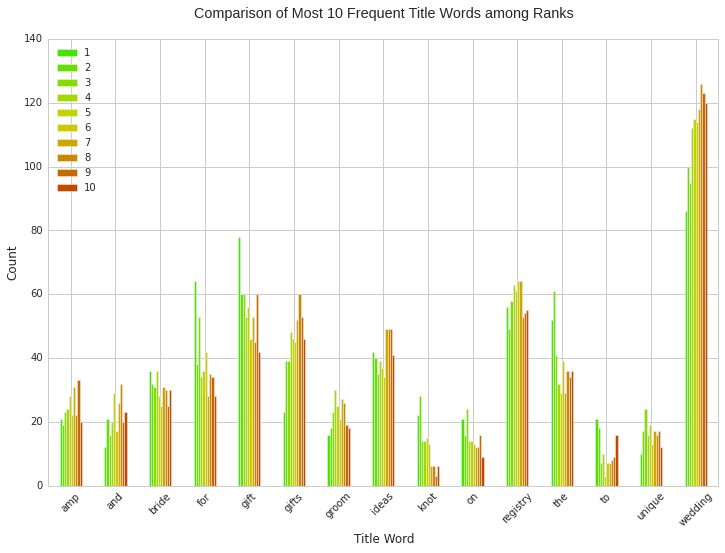

In [748]:
my_colors = ['#45E500', '#65E100', '#84DD00', '#A2D900', '#BED500', '#D2CA00', '#CEA800', '#CA8700', '#C66700', '#C24900', '#BF2C00']
ax = td_df.ix[sorted(topn_words_for_all_ranks_combined)].plot(kind='bar', figsize=(12, 8), color=my_colors)
ax.set_ylabel("Count")
ax.set_xlabel("Title Word")
plt.xticks(rotation=45);
plt.title("Comparison of Most {0} Frequent Title Words among Ranks\n".format(topn))
plt.savefig('title_frequent_words.png', type='png')

* use ampersands instead of 'and' ?
* knot is popular
* gift is popular

### Wordclouds of Rankings' Descriptions

In [608]:
import os

for rank in range(n_ratings):
    bigrams = ["%s %s" % bi for bi in nltk.bigrams(nltk.tokenize.word_tokenize(s[rank+1]))]
    bigrams_df = pd.DataFrame.from_dict(Counter(bigrams).most_common(len(s[rank+1])))
    bigrams_df.to_csv('{0}_bigrams.csv'.format(rank+1), index=False)
    
    trigrams = ["%s %s %s" % tri for tri in nltk.trigrams(nltk.tokenize.word_tokenize(s[rank+1]))]
    trigrams_df = pd.DataFrame.from_dict(Counter(trigrams).most_common(len(s[rank+1])))
    trigrams_df.to_csv('{0}_trigrams.csv'.format(rank+1), index=False)    

!ls *bigrams.csv *trigrams.csv

10_bigrams.csv	 2_bigrams.csv	 4_bigrams.csv	 6_bigrams.csv	 8_bigrams.csv
10_trigrams.csv  2_trigrams.csv  4_trigrams.csv  6_trigrams.csv  8_trigrams.csv
1_bigrams.csv	 3_bigrams.csv	 5_bigrams.csv	 7_bigrams.csv	 9_bigrams.csv
1_trigrams.csv	 3_trigrams.csv  5_trigrams.csv  7_trigrams.csv  9_trigrams.csv


In [632]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [590]:
%%R
library(tm)
library(wordcloud)
library(RColorBrewer)

Loading required package: NLP
Loading required package: RColorBrewer


In [625]:
topn_words = 50

In [627]:
%%R -i n_ratings,topn_words

palettes <- colorRampPalette( c("green", "red"), space="rgb")(n_ratings)

for (rank in 1:n_ratings) {
    rank.bigrams.path <- paste(rank, '_bigrams.csv',sep='')
    rank.trigrams.path <- paste(rank, '_trigrams.csv',sep='')
    rank.bigrams.df <- read.csv(rank.bigrams.path)
    rank.trigrams.df <- read.csv(rank.trigrams.path)
    rank.wordcloud.df <- rbind(rank.bigrams.df[1:topn_words,], rank.trigrams.df[1:topn_words,])
    rank.wordcloud.df <- rank.wordcloud.df[with(rank.wordcloud.df, order(-X1, X0)),]
    
    pal <- palettes[rank]
    png(paste(rank, '_rank_wordcloud.png',sep=''), width=960, height=960)
    wordcloud(rank.wordcloud.df$X0, rank.wordcloud.df$X1 , max.words=200, colors=pal)
    dev.off()
}

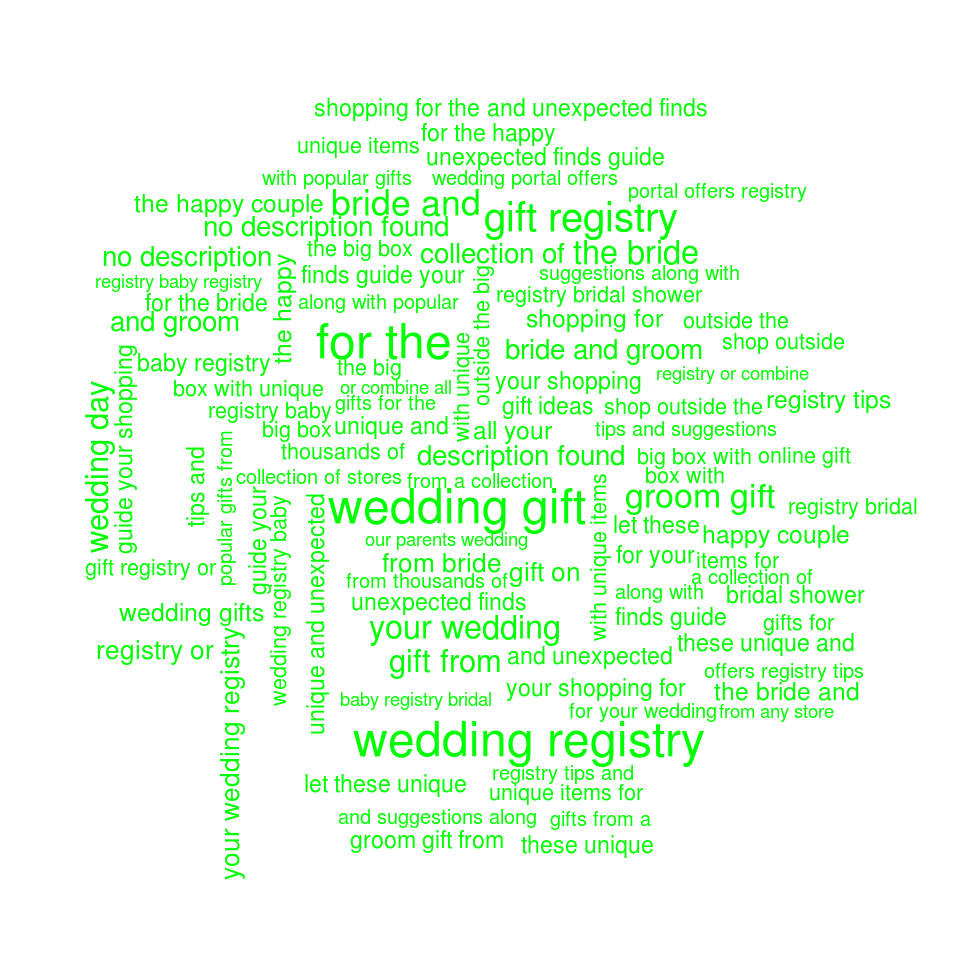

In [629]:
Image("/home/kevin/macys/wordclouds/1_rank_wordcloud.png")

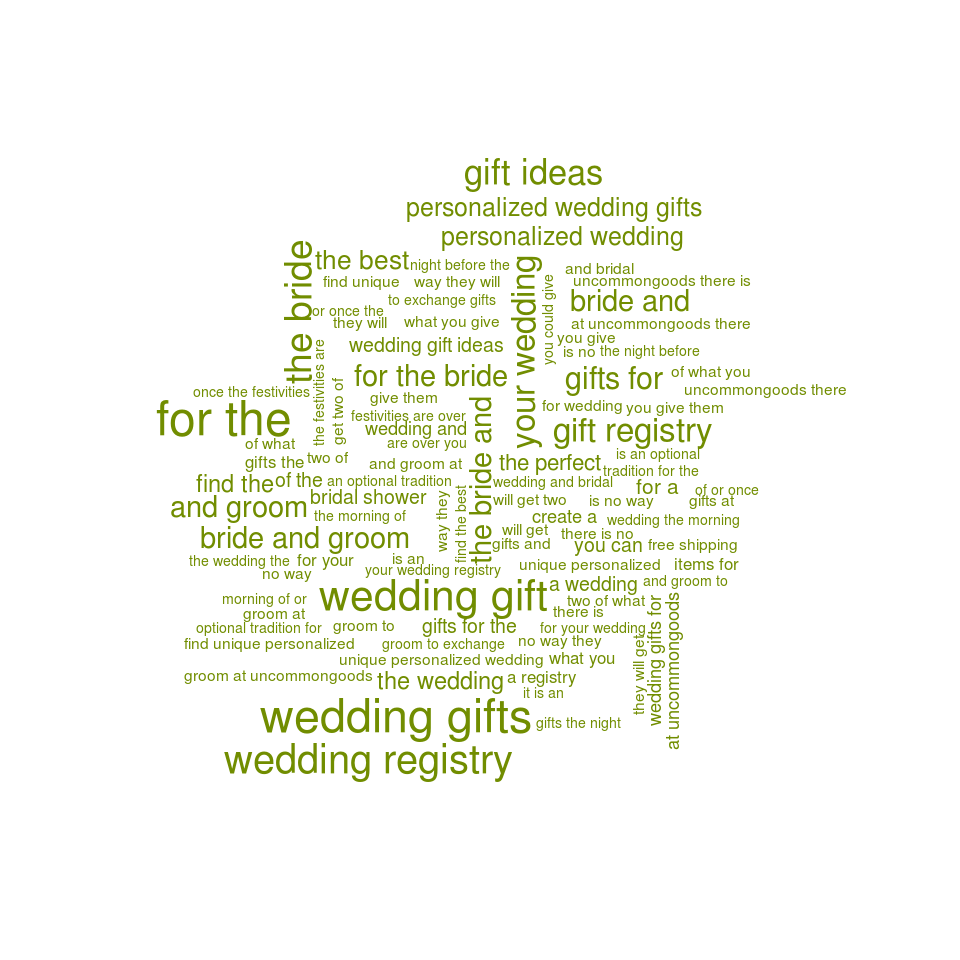

In [630]:
Image("/home/kevin/macys/wordclouds/5_rank_wordcloud.png")

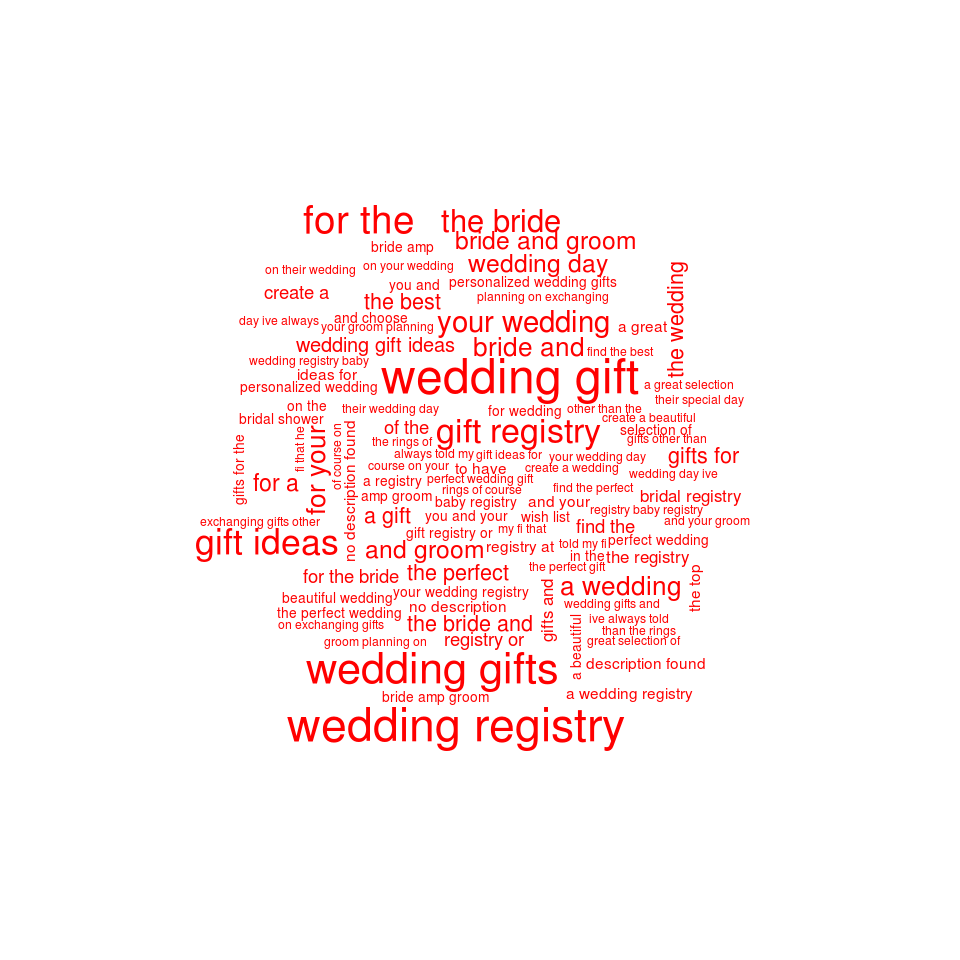

In [631]:
Image("/home/kevin/macys/wordclouds/10_rank_wordcloud.png")

### Macy's Similarity (MDS)

### LDA Visualization
##### Note:  More Tips for Exploring Text Data
http://blog.kaggle.com/2015/08/18/crowdflower-scripts-approaching-nlp/

http://cpsievert.github.io/LDAvis/reviews/reviews.html

In [648]:
%%R
### kaggle script
# https://www.kaggle.com/solution/crowdflower-search-relevance/lda-visualization/code

### reference site
#http://cpsievert.github.io/LDAvis/reviews/reviews.html

library(readr)
library(tm)
library(SnowballC)
library(Matrix)
library(lda)
library(LDAvis)
library(servr)

# read data
train = read_csv("WeddingScrapeWithDomain.csv");
#test = read_csv("test.csv");

txt = paste(train$Domain,train$Description);
#txt = c(txt,paste(test$query,test$product_title));


# pre-processing
txt <- gsub("'", "", txt)  # remove apostrophes
txt <- gsub("[[:punct:]]", " ", txt)  # replace punctuation with space
txt <- gsub("[[:cntrl:]]", " ", txt)  # replace control characters with space
txt <- gsub("^[[:space:]]+", "", txt) # remove whitespace at beginning of documents
txt <- gsub("[[:space:]]+$", "", txt) # remove whitespace at end of documents
txt <- tolower(txt)  # force to lowercase

# tokenize on space and output as a list:
doc.list <- strsplit(txt, "[[:space:]]+")

# compute the table of terms:
term.table <- table(unlist(doc.list))
term.table <- sort(term.table, decreasing = TRUE)

# stop words
stop_words = c('http','www','img','border','color','style','padding','table','font','thi','inch','ha','width','height')
stop_words <- c(stop_words, stopwords("SMART"))

# remove terms that are stop words or occur fewer than 5 times:
del <- names(term.table) %in% stop_words | term.table < 5
term.table <- term.table[!del]
vocab <- names(term.table)

# now put the documents into the format required by the lda package:
get.terms <- function(x) {
  index <- match(x, vocab)
  index <- index[!is.na(index)]
  rbind(as.integer(index - 1), as.integer(rep(1, length(index))))
}
documents <- lapply(doc.list, get.terms)



# Compute some statistics related to the data set:
D <- length(documents) # number of documents
W <- length(vocab)  # number of terms in the vocab
doc.length <- sapply(documents, function(x) sum(x[2, ]))  # number of tokens per document
N <- sum(doc.length)  # total number of tokens in the data
term.frequency <- as.integer(term.table) # frequencies of terms in the corpus

# MCMC and model tuning parameters:
K <- 7
G <- 1000
alpha <- 0.02
eta <- 0.02

# Fit the model:
set.seed(357)
t1 <- Sys.time()
fit <- lda.collapsed.gibbs.sampler(documents = documents, K = K, vocab = vocab, 
                                   num.iterations = G, alpha = alpha, 
                                   eta = eta, initial = NULL, burnin = 0,
                                   compute.log.likelihood = TRUE)
t2 <- Sys.time()
t2 - t1  


### Visualizing the fitted model with LDAvis
theta <- t(apply(fit$document_sums + alpha, 2, function(x) x/sum(x)))
phi <- t(apply(t(fit$topics) + eta, 2, function(x) x/sum(x)))

results <- list(phi = phi,
                theta = theta,
                doc.length = doc.length,
                vocab = vocab,
                term.frequency = term.frequency)


# create the JSON object to feed the visualization:
json <- createJSON(phi = results$phi, 
                   theta = results$theta, 
                   doc.length = results$doc.length, 
                   vocab = results$vocab, 
                   term.frequency = results$term.frequency)

serVis(json, out.dir = './', open.browser = FALSE)
system("mv index.html results.html")

In [763]:
from IPython.display import HTML

HTML("<iframe src=./lda/results.html width=1100 height=800></iframe>")